<a href="https://colab.research.google.com/github/fartech00/01/blob/main/SVM_CNN_GAN_LM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CV ga oid misollar


*   **CNN** model qurish
*
1.  https://poloclub.github.io/cnn-explainer/
2.  https://adamharley.com/nn_vis/cnn/3d.html
3.  https://playground.tensorflow.org/



K-Nearest Neighbors (KNN) Natija:
Aniqliligi: 1.0000
Klassifikatsiya:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Decision Tree Natija:
Aniqliligi: 1.0000
Klassifikatsiya:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0

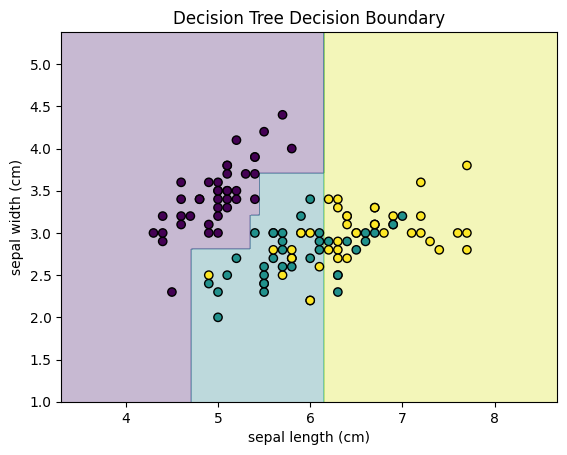

In [118]:
# Kutibxonalarni chaqirib olish
#============================================================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#=============================================================================


#=====================================
# Tasvirli malumotlarni yuklab olamiz

iris = datasets.load_iris()
# https://images.app.goo.gl/6BuqKh34ztz2cxkV8
# https://images.app.goo.gl/JdgP7T8szSBTLbsf9

X, y = iris.data, iris.target  # Nomlariga moslab bo'lib olamiz

#
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#==============================================================================================================
# ======> MOdelni qurish   <==========
def train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)

    print(f"\n{model_name} Natija:")
    print(f"Aniqliligi: {accuracy:.4f}")
    print("Klassifikatsiya:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

#================================================================================================================

# 1. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate(knn, X_train_scaled, X_test_scaled, y_train, y_test, "K-Nearest Neighbors (KNN)")


# 2. Decision Tree (Qaror qabul qiluvchi daraxt)
dt = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
train_and_evaluate(dt, X_train, X_test, y_train, y_test, "Decision Tree")


# 3. Random Forest (Taxminiy o'rmon)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate(rf, X_train, X_test, y_train, y_test, "Random Forest")


# 4. Support Vector Machine (SVM)
svm = SVC(kernel='linear', C=1.0, random_state=42)
train_and_evaluate(svm, X_train_scaled, X_test_scaled, y_train, y_test, "Support Vector Machine (SVM)")

#===============================================================================================================


def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Tekshirib ko'rish
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot qilsih
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title(title)
    plt.show()

#===============================================================================================================

X_train_2D, X_test_2D = X_train[:, :2], X_test[:, :2]
dt_2D = DecisionTreeClassifier(max_depth=4, random_state=42).fit(X_train_2D, y_train)
plot_decision_boundary(dt_2D, X_train_2D, y_train, "Decision Tree Decision Boundary")




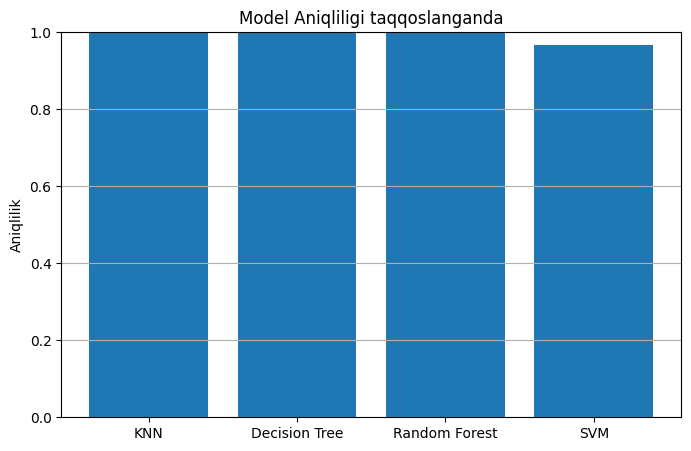

In [119]:
import matplotlib.pyplot as plt

accuracies = {
    "KNN": accuracy_score(y_test, knn.predict(X_test_scaled)),
    "Decision Tree": accuracy_score(y_test, dt.predict(X_test)),
    "Random Forest": accuracy_score(y_test, rf.predict(X_test)),
    "SVM": accuracy_score(y_test, svm.predict(X_test_scaled))
}

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(accuracies.keys(), accuracies.values())
plt.title("Model Aniqliligi taqqoslanganda")
plt.ylabel("Aniqlilik")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


In [1]:
import os
import zipfile
import shutil

# Git Hub dan tasvirli malumotni yuklab olamiz
repo_url = "https://github.com/fartech00/iris_data_2.git"

repo_name = "iris_data_2"
repo_path = f"/content/{repo_name}"

if os.path.exists(repo_path):
    shutil.rmtree(repo_path)

# Git hub dan klon qilamiz
!git clone {repo_url}

os.chdir(repo_path)

# Zip papkani topamiz va zip.dan chiqaramiz
zip_files = [f for f in os.listdir() if f.endswith(".zip")]

if zip_files:
    zip_file = zip_files[0]
    print(f"Zip fayl: {zip_file}. Ajratish...")

    # Zipdagi fayllarni chiqarish
    with zipfile.ZipFile(zip_file, "r") as zip_ref:
        zip_ref.extractall(repo_path)

    print("Zipdan ajraldi!")

    # Mazjud zip faylni o'chirib yuborish
    os.remove(zip_file)
print("\nZipdan chiqqanlari:")
print(os.listdir(repo_path))

Cloning into 'iris_data_2'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 22.69 MiB | 13.81 MiB/s, done.
Zip fayl: data_svm.zip. Ajratish...
Zipdan ajraldi!

Zipdan chiqqanlari:
['.git', 'test_data.zip', 'data']


In [2]:
import numpy as np
import cv2
# from sklearn.model_selection import train_test_split # for splitting data into train and test sets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

def load_images_from_folder(folder, img_size=(64, 64)):
    X, y = [], []
    class_labels = sorted(os.listdir(folder))  # Papka nomlarini klass labeli sifatida olish
    label_map = {label: idx for idx, label in enumerate(class_labels)}

    for class_name in class_labels:
        class_path = os.path.join(folder, class_name)
        if not os.path.isdir(class_path):
            continue

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, img_size)
                img = img.flatten()
                X.append(img)
                y.append(label_map[class_name])  # Labellarni moslashtirish

    return np.array(X), np.array(y)

dataset_folder = "/content/iris_data_2/data"
train_folder = os.path.join(dataset_folder, "train")
val_folder = os.path.join(dataset_folder, "val")


X_train, y_train = load_images_from_folder(train_folder)
X_val, y_val = load_images_from_folder(val_folder)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

svm_classifier = SVC(kernel='linear', C=1)


svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print(f"SVM Model : {accuracy:.4f}")
print("Klassifikatsiya natijasi:\n", classification_report(y_val, y_pred))


SVM Model : 0.6891
Klassifikatsiya natijasi:
               precision    recall  f1-score   support

           0       0.64      0.77      0.70       111
           1       0.76      0.61      0.68       127

    accuracy                           0.69       238
   macro avg       0.70      0.69      0.69       238
weighted avg       0.70      0.69      0.69       238



In [3]:
import os
import numpy as np
import cv2
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report


def load_images_from_folder(folder, img_size=(64, 64)):
    X, y = [], []
    class_labels = sorted(os.listdir(folder))
    label_map = {label: idx for idx, label in enumerate(class_labels)}

    for class_name in class_labels:
        class_path = os.path.join(folder, class_name)
        if not os.path.isdir(class_path):
            continue

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, img_size)
                img = img.flatten()
                X.append(img)
                y.append(label_map[class_name])

    return np.array(X), np.array(y), label_map


dataset_folder = "/content/iris_data_2/data"
train_folder = os.path.join(dataset_folder, "train")
val_folder = os.path.join(dataset_folder, "val")

X_train, y_train, label_map = load_images_from_folder(train_folder)
X_val, y_val, _ = load_images_from_folder(val_folder)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Dimensionality reduction
pca = PCA(n_components=100)
X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)


best_accuracy = 0
final_model = None

for epoch in range(1, 3):
    print(f"Epoch {epoch}/3:")

    svm_classifier = SVC(kernel='linear', C=0.5)
    svm_classifier.fit(X_train, y_train)

    # Evaluate model
    y_pred = svm_classifier.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred) * 100
    print(f"Validation Accuracy: {accuracy:.2f}%")

    # Save best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        final_model = svm_classifier

# Save final model
joblib.dump(final_model, "svm_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(pca, "pca.pkl")
joblib.dump(label_map, "label_map.pkl")

print("\n Saqlandi: 'svm_model.pkl'")

Epoch 1/3:
Validation Accuracy: 80.67%
Epoch 2/3:
Validation Accuracy: 80.67%

 Saqlandi: 'svm_model.pkl'


In [5]:
import zipfile
import os

zip_path = "/content/iris_data_2/test_data.zip"
extract_path = "/content/test"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Zip dan chiqdi")


Zip dan chiqdi


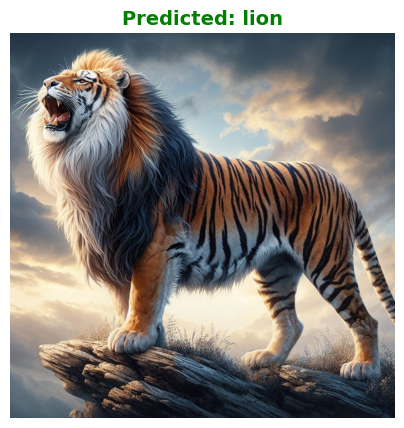

In [7]:
import joblib

def preprocess_image(image_path, img_size=(64, 64)):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Xatolik: {image_path}")
    img = cv2.resize(img, img_size)
    img = img.flatten()  #
    return img

def predict_image(image_path, model, scaler, pca, label_map, img_size=(64, 64)):
    img = preprocess_image(image_path, img_size)
    img_scaled = scaler.transform([img])
    img_pca = pca.transform(img_scaled)
    pred_label = model.predict(img_pca)[0]
    class_name = {v: k for k, v in label_map.items()}[pred_label]
    return class_name, img_pca

svm_classifier = joblib.load("svm_model.pkl")
scaler = joblib.load("scaler.pkl")
pca = joblib.load("pca.pkl")
label_map = joblib.load("label_map.pkl")

# Test qilish
test_image_path = "/content/test/test_data/liger.jpg"
predicted_class, img_data = predict_image(test_image_path, svm_classifier, scaler, pca, label_map)

# ko'rish
img_to_show = cv2.imread(test_image_path)
img_to_show = cv2.cvtColor(img_to_show, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5, 5))
plt.imshow(img_to_show)
plt.axis("off")
plt.title(f"Taxmin: {predicted_class}", fontsize=14, fontweight="bold", color="green")
plt.show()

PCA ishlatildi! 100 

🔹 SVM Model Accuracy: 0.7899
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.69      0.75       111
           1       0.77      0.87      0.82       127

    accuracy                           0.79       238
   macro avg       0.80      0.78      0.79       238
weighted avg       0.79      0.79      0.79       238



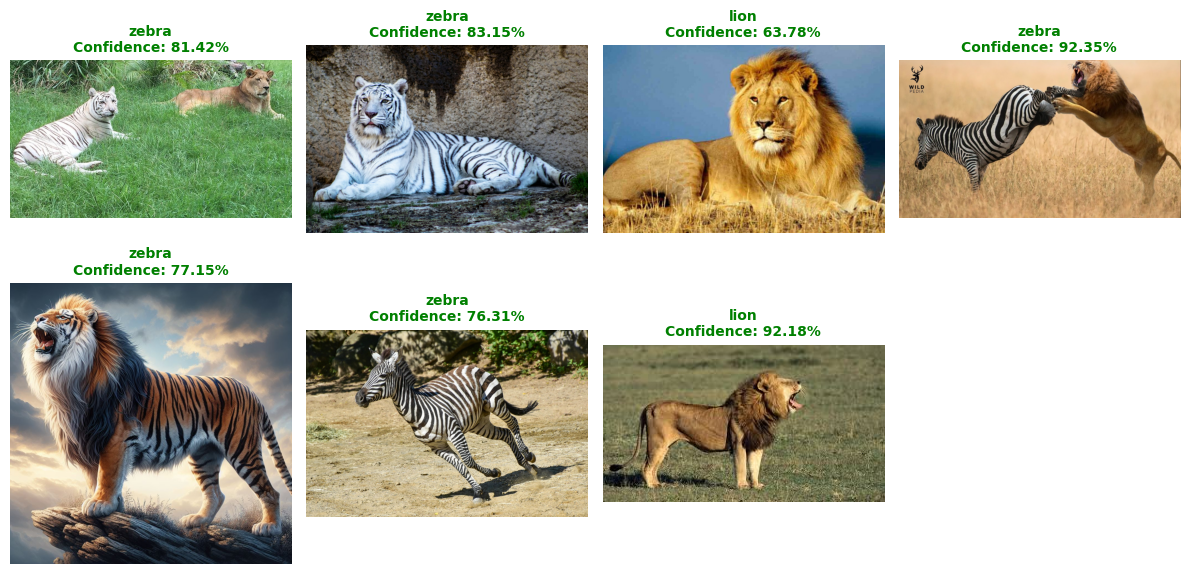

In [7]:
import matplotlib.pyplot as plt



def load_images_from_folder(folder, img_size=(64, 64)):
    X, y = [], []
    class_labels = sorted(os.listdir(folder))
    label_map = {label: idx for idx, label in enumerate(class_labels)}

    for class_name in class_labels:
        class_path = os.path.join(folder, class_name)
        if not os.path.isdir(class_path):
            continue  # Skip non-folder files

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, img_size)
                img = img.flatten()
                X.append(img)
                y.append(label_map[class_name])

    return np.array(X), np.array(y), label_map

# dataset
dataset_folder = "/content/iris_data_2/data"
train_folder = os.path.join(dataset_folder, "train")
val_folder = os.path.join(dataset_folder, "val")

X_train, y_train, label_map = load_images_from_folder(train_folder)
X_val, y_val, _ = load_images_from_folder(val_folder)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

USE_PCA = True
PCA_COMPONENTS = 100

if USE_PCA:
    pca = PCA(n_components=PCA_COMPONENTS)
    X_train = pca.fit_transform(X_train)
    X_val = pca.transform(X_val)
    print(f"PCA ishlatildi! {PCA_COMPONENTS} ")
else:
    pca = None
    print("PCA ishlatilmadi!")

# Kernel
KERNEL_TYPE = "rbf"

C_VALUE = 1

#  SVM Model
svm_classifier = SVC(kernel=KERNEL_TYPE, C=C_VALUE, probability=True)
svm_classifier.fit(X_train, y_train)

# Evaluate
y_pred = svm_classifier.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print(f"\n🔹 SVM Model Accuracy: {accuracy:.4f}")
print("🔹 Classification Report:\n", classification_report(y_val, y_pred))

def predict_image(image_path, model, scaler, pca, label_map, img_size=(64, 64)):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Error loading image: {image_path}")
    img = cv2.resize(img, img_size).flatten()
    img_scaled = scaler.transform([img])

    if pca:
        img_pca = pca.transform(img_scaled)  #  PCA
    else:
        img_pca = img_scaled

    pred_probs = model.predict_proba(img_pca)[0]
    pred_label = model.predict(img_pca)[0]
    class_name = {v: k for k, v in label_map.items()}[pred_label]
    confidence = max(pred_probs)
    return class_name, confidence, img_pca

#  Predict All Images
def predict_images_in_directory(directory, model, scaler, pca, label_map, img_size=(64, 64)):
    images = []
    predictions = []

    for img_name in os.listdir(directory):
        img_path = os.path.join(directory, img_name)
        if os.path.isfile(img_path):
            class_name, confidence, img_data = predict_image(img_path, model, scaler, pca, label_map, img_size)
            images.append(cv2.imread(img_path))
            predictions.append((img_name, class_name, confidence))

    return images, predictions

# Testing
test_folder = "/content/test/test_data"
images, predictions = predict_images_in_directory(test_folder, svm_classifier, scaler, pca, label_map)

# Display
plt.figure(figsize=(12, 6))
for idx, (img, (img_name, pred_class, conf)) in enumerate(zip(images, predictions)):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, len(images) // 2 + 1, idx + 1)
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title(f"{pred_class}\nConfidence: {conf:.2%}", fontsize=10, fontweight="bold", color="green")

plt.tight_layout()
plt.show()

Klasslar: ['lion', 'zebra']


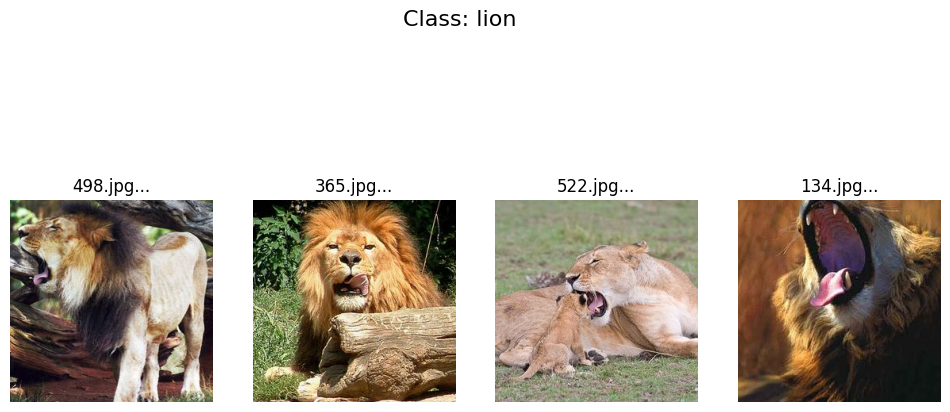

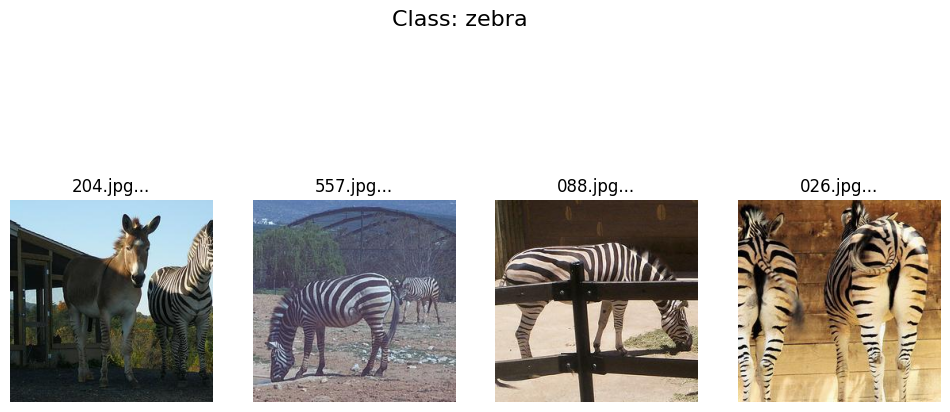

In [8]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# 1) Settings
DATASET_DIR = "/content/iris_data_2/data"
TRAIN_DIR = os.path.join(DATASET_DIR, "train")

NUM_IMAGES = 4


def show_images_from_class(class_path, class_name, num_images=4):
    """Displays random sample images from a class folder."""
    images = os.listdir(class_path)
    images = [img for img in images if img.lower().endswith((".jpg", ".png", ".jpeg"))]

    if len(images) == 0:
        print(f"No images found for class: {class_name}")
        return

    sample = random.sample(images, min(num_images, len(images)))

    plt.figure(figsize=(12, 6))
    plt.suptitle(f"Class: {class_name}", fontsize=16)

    for i, img_name in enumerate(sample):
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path)

        plt.subplot(1, len(sample), i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(img_name[:15] + "...")

    plt.show()

class_folders = sorted(os.listdir(TRAIN_DIR))

print("Klasslar:", class_folders)

for class_name in class_folders:
    class_path = os.path.join(TRAIN_DIR, class_name)

    if os.path.isdir(class_path):
        show_images_from_class(class_path, class_name, NUM_IMAGES)


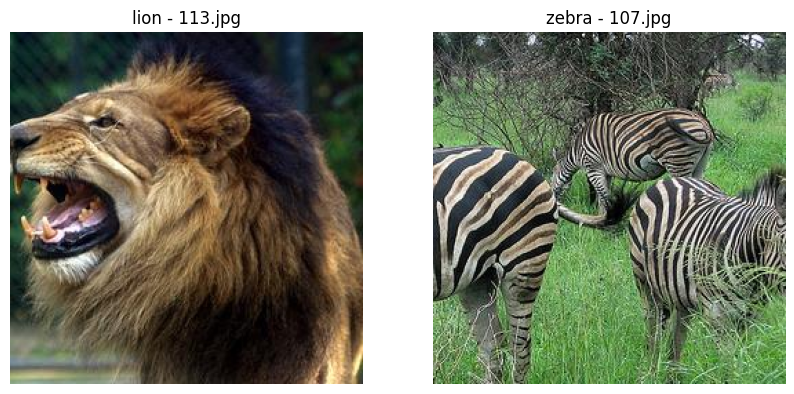

In [ ]:
import os
import time
from IPython.display import clear_output
from PIL import Image
import matplotlib.pyplot as plt

# Dataset path
DATASET_DIR = "/content/iris_data_2/data"
TRAIN_DIR = os.path.join(DATASET_DIR, "train")

CLASS_A = "lion"
CLASS_B = "zebra"

DELAY = 0.7
pathA = os.path.join(TRAIN_DIR, CLASS_A)
pathB = os.path.join(TRAIN_DIR, CLASS_B)

imgsA = sorted([f for f in os.listdir(pathA) if f.lower().endswith(("jpg","png"))])
imgsB = sorted([f for f in os.listdir(pathB) if f.lower().endswith(("jpg","png"))])

max_len = max(len(imgsA), len(imgsB))

print(f"Showing {CLASS_A} and {CLASS_B} together…")

# GIF-style loop
for i in range(max_len):
    clear_output(wait=True)

    imgA = Image.open(os.path.join(pathA, imgsA[i % len(imgsA)]))
    imgB = Image.open(os.path.join(pathB, imgsB[i % len(imgsB)]))

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(imgA)
    plt.title(f"{CLASS_A} - {imgsA[i % len(imgsA)]}")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(imgB)
    plt.title(f"{CLASS_B} - {imgsB[i % len(imgsB)]}")
    plt.axis("off")

    plt.show()

    time.sleep(DELAY)


### Yuqorida dataset ni yuklab oldik.
### Endi CNN model quramiz

ERROR: Could not find a version that satisfies the requirement tensorflow==2.12.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.19.1, 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.12.0
Found 947 files belonging to 2 classes.
Found 238 files belonging to 2 classes.
Classes: ['lion', 'zebra']


Model: "simple_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 423,490 (1.62 MB)

 Trainable params: 422,530 (1.61 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.7767 - loss: 0.5827
Epoch 1: val_loss improved from inf to 0.81134, saving model to cnn_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 325ms/step - accuracy: 0.7773 - loss: 0.5803 - val_accuracy: 0.4664 - val_loss: 0.8113 - learning_rate: 0.0010
Epoch 2/25
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.8639 - loss: 0.3041
Epoch 2: val_loss did not improve from 0.81134
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - accuracy: 0.8633 - loss: 0.3051 - val_accuracy: 0.4664 - val_loss: 0.9712 - learning_rate: 0.0010
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8668 - loss: 0.2994
Epoch 3: val_loss did not improve from 0.81134
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.8670 - loss: 0.2992 - val_accuracy: 0.4664 - val_loss: 0.8348 - learning_rate: 0.0010
Epoch 4/25
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9017 - loss: 0.2455
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 4: val_loss did not improve from 0.81134
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.9010 - loss: 0.2476 - val_accuracy: 0.4664 - va

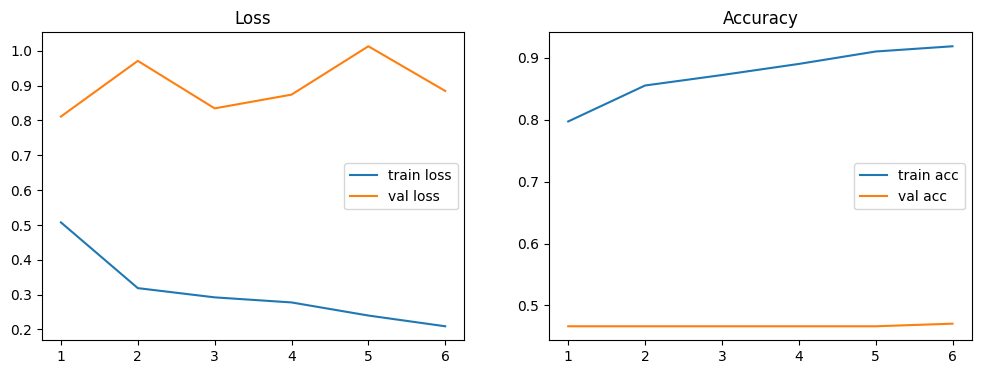

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
Classification report:

              precision    recall  f1-score   support

        lion       0.47      1.00      0.64       111
       zebra       0.00      0.00      0.00       127

    accuracy                           0.47       238
   macro avg       0.23      0.50      0.32       238
weighted avg       0.22      0.47      0.30       238

Done.


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:

!pip install -q tensorflow==2.12.0
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# 1) Settings
DATASET_DIR = "/content/iris_data_2/data"
TRAIN_DIR = os.path.join(DATASET_DIR, "train")
VAL_DIR   = os.path.join(DATASET_DIR, "val")

IMG_SIZE = (128, 128)
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE
NUM_EPOCHS = 25
MODEL_SAVE_PATH = "cnn_classifier.h5"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_DIR,
    labels="inferred",
    label_mode="int",
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=True,
    seed=123,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    VAL_DIR,
    labels="inferred",
    label_mode="int",
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=False
)

# Get class names
class_names = train_ds.class_names
num_classes = len(class_names)
print("Classes:", class_names)

# 3) Data pipeline performance improvements
def prepare(ds, shuffle=False, augment=False):
    ds = ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y), num_parallel_calls=AUTOTUNE)
    if shuffle:
        ds = ds.shuffle(1000)
    if augment:
        data_augmentation = keras.Sequential([
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.08),
            layers.RandomZoom(0.08),
            layers.RandomContrast(0.08),
        ])
        ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)
    return ds.prefetch(buffer_size=AUTOTUNE)

train_ds = prepare(train_ds, shuffle=True, augment=True)
val_ds   = prepare(val_ds, shuffle=False, augment=False)

# CNN model
def build_cnn(input_shape=(*IMG_SIZE, 3), num_classes=num_classes):
    inputs = keras.Input(shape=input_shape)

    x = layers.Conv2D(32, 3, padding="same", activation="relu")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool2D(2)(x)

    x = layers.Conv2D(64, 3, padding="same", activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool2D(2)(x)

    x = layers.Conv2D(128, 3, padding="same", activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool2D(2)(x)

    x = layers.Conv2D(256, 3, padding="same", activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool2D(2)(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs, name="simple_cnn")
    return model

model = build_cnn()
model.summary()

# 5) Compile
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

# 6) Callbacks
callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1),
    ModelCheckpoint(MODEL_SAVE_PATH, monitor="val_loss", save_best_only=True, verbose=1),
]

# 7) Train
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=NUM_EPOCHS,
    callbacks=callbacks,
)

# 8) Save final model
model.save("cnn_final_model.h5")

# 9) Plot training
def plot_history(history):
    h = history.history
    epochs = range(1, len(h["loss"]) + 1)

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, h["loss"], label="train loss")
    plt.plot(epochs, h["val_loss"], label="val loss")
    plt.legend(); plt.title("Loss")

    plt.subplot(1,2,2)
    plt.plot(epochs, h["accuracy"], label="train acc")
    plt.plot(epochs, h["val_accuracy"], label="val acc")
    plt.legend(); plt.title("Accuracy")
    plt.show()

plot_history(history)

# 10) Evaluate on validation
y_true = np.concatenate([y.numpy() for x, y in val_ds], axis=0)
x_val = np.concatenate([x.numpy() for x, y in val_ds], axis=0)
x_val = x_val.astype("float32") / 1.0  # already normalized in pipeline

y_pred_probs = model.predict(x_val, batch_size=BATCH_SIZE)
y_pred = np.argmax(y_pred_probs, axis=1)

from sklearn.metrics import classification_report, confusion_matrix
print("Classification report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# 11) Simple inference example on a single image
import cv2
def predict_image(img_path, model, img_size=IMG_SIZE, class_names=class_names):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, img_size)
    x = img_resized.astype("float32") / 255.0
    x = np.expand_dims(x, axis=0)
    probs = model.predict(x)[0]
    idx = np.argmax(probs)
    return class_names[idx], probs[idx]

print("Done.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


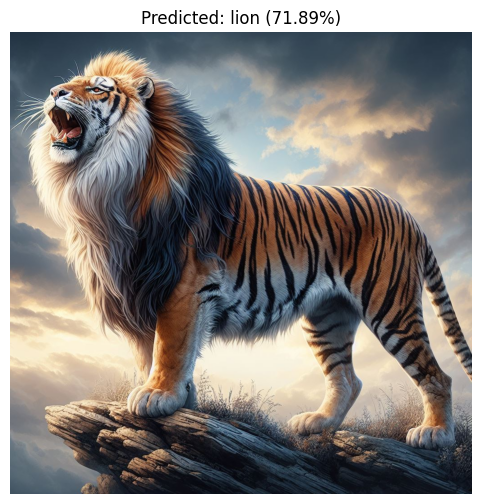

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# -----------------------------
# 1) Load trained model
# -----------------------------
model_path = "/content/iris_data_2/cnn_classifier.h5"
model = load_model(model_path)

# -----------------------------
# 2) Define class names
# -----------------------------
class_names = ["lion", "zebra"]

# -----------------------------
# 3) Prediction + visualization
# -----------------------------
def visualize_prediction(model, img_path, class_names, img_size=(128,128)):
    # Load image
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, img_size)

    # Preprocess
    x = img_resized.astype("float32") / 255.0
    x = np.expand_dims(x, axis=0)

    # Predict
    pred = model.predict(x)[0]
    class_id = np.argmax(pred)
    confidence = pred[class_id]

    # Show result
    plt.figure(figsize=(6,6))
    plt.imshow(img_rgb)
    plt.title(f"Predicted: {class_names[class_id]} ({confidence*100:.2f}%)")
    plt.axis(False)
    plt.show()


# -----------------------------
# 4) Run test image
# -----------------------------
img_path = "/content/test/test_data/liger.jpg"
visualize_prediction(model, img_path, class_names)


## Chek qog'ozdan malumotlarni ajratish


https://share.google/qR6gVd88ecgwmKdeP

In [20]:
!pip install pytesseract
import re
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt

from skimage.filters import threshold_local
from PIL import Image
from pytesseract import Output
from prettytable import PrettyTable

In [21]:
#Resize image
def opencv_resize(image, ratio):
    width = int(image.shape[1] * ratio)
    height = int(image.shape[0] * ratio)
    dim = (width, height)
    return cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

#Display grey scale image
def plot_gray(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(image, cmap='Greys_r')

#Display RGB colour image
def plot_rgb(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

#We will use approxPolyDP for approximating more primitive contour shape consisting of as few points as possible
#Approximate the contour by a more primitive polygon shape
def approximate_contour(contour):
    peri = cv2.arcLength(contour, True)
    return cv2.approxPolyDP(contour, 0.032 * peri, True)

#Find 4 points of receipt
def get_receipt_contour(contours):
    # loop over the contours
    for c in contours:
        approx = approximate_contour(c)
        # if our approximated contour has four points, we can assume it is receipt's rectangle
        if len(approx) == 4:
            return approx

#Convert 4 points into lines / rect
def contour_to_rect(contour):
    pts = contour.reshape(4, 2)
    rect = np.zeros((4, 2), dtype = "float32")
    # top-left point has the smallest sum
    # bottom-right has the largest sum
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    # compute the difference between the points:
    # the top-right will have the minumum difference
    # the bottom-left will have the maximum difference
    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    return rect / resize_ratio

#Original receipt with wrapped perspective
def wrap_perspective(img, rect):
    # unpack rectangle points: top left, top right, bottom right, bottom left
    (tl, tr, br, bl) = rect
    # compute the width of the new image
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    # compute the height of the new image
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    # take the maximum of the width and height values to reach
    # our final dimensions
    maxWidth = max(int(widthA), int(widthB))
    maxHeight = max(int(heightA), int(heightB))
    # destination points which will be used to map the screen to a "scanned" view
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")
    # calculate the perspective transform matrix
    M = cv2.getPerspectiveTransform(rect, dst)
    # warp the perspective to grab the screen
    return cv2.warpPerspective(img, M, (maxWidth, maxHeight))

#Threshold image
def bw_scanner(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    T = threshold_local(gray, 21, offset = 5, method = "gaussian")
    return (gray > T).astype("uint8") * 255

def plot_gray(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(image, cmap='Greys_r')

def plot_rgb(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

def find_amounts(text):
    amounts = re.findall(r'\d+\.\d{2}\b', text)
    floats = [float(amount) for amount in amounts]
    unique = list(dict.fromkeys(floats))
    return unique

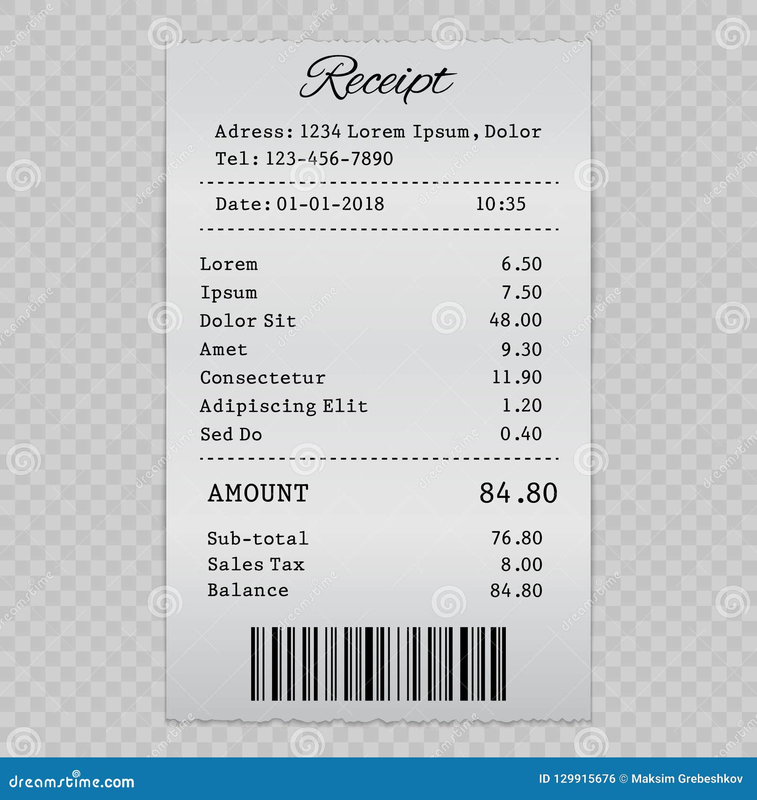

In [93]:
file_name = '/content/c.jpg'

img = Image.open(file_name)
img.thumbnail((800,800), Image.LANCZOS)
img

In [94]:
image = cv2.imread(file_name)

#Downscale image.
#Finding receipt contour is more efficient on a small image
resize_ratio = 500 / image.shape[0]
original = image.copy()
image = opencv_resize(image, resize_ratio)

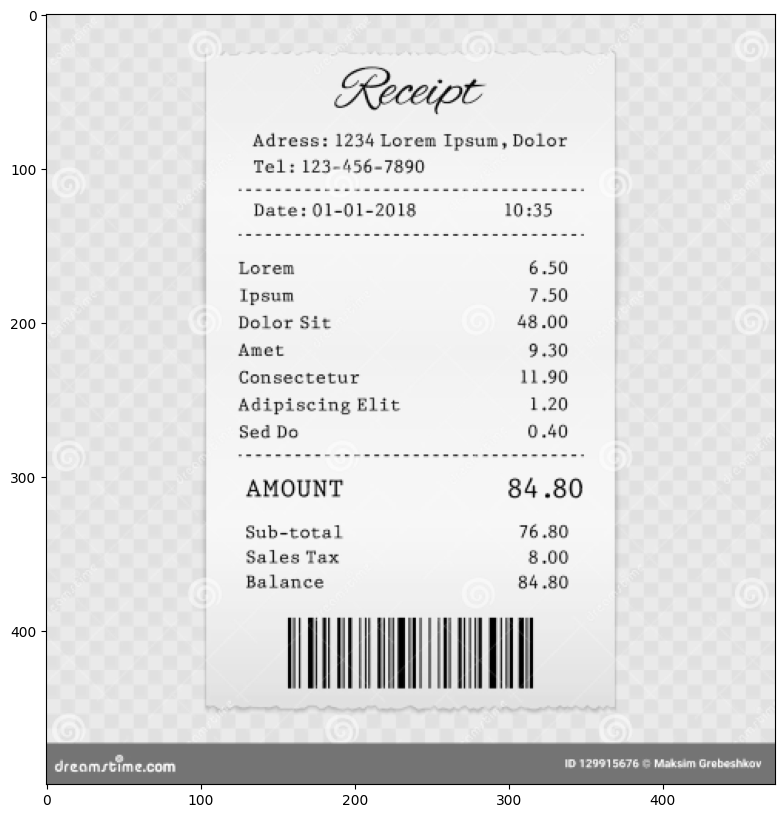

In [95]:
# Convert to grayscale for further processing
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plot_gray(gray)

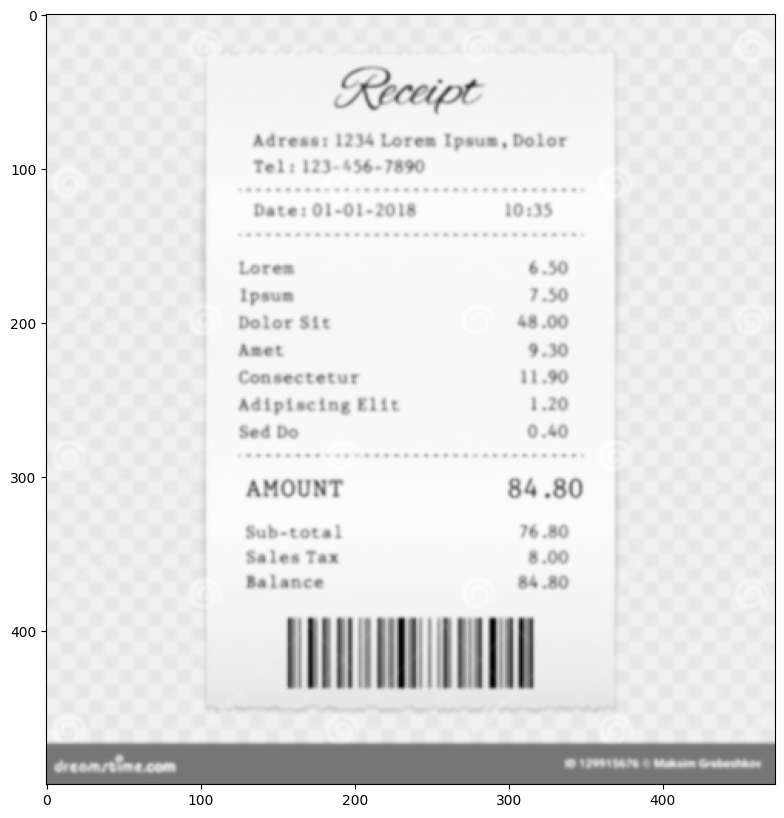

In [96]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plot_gray(blurred)

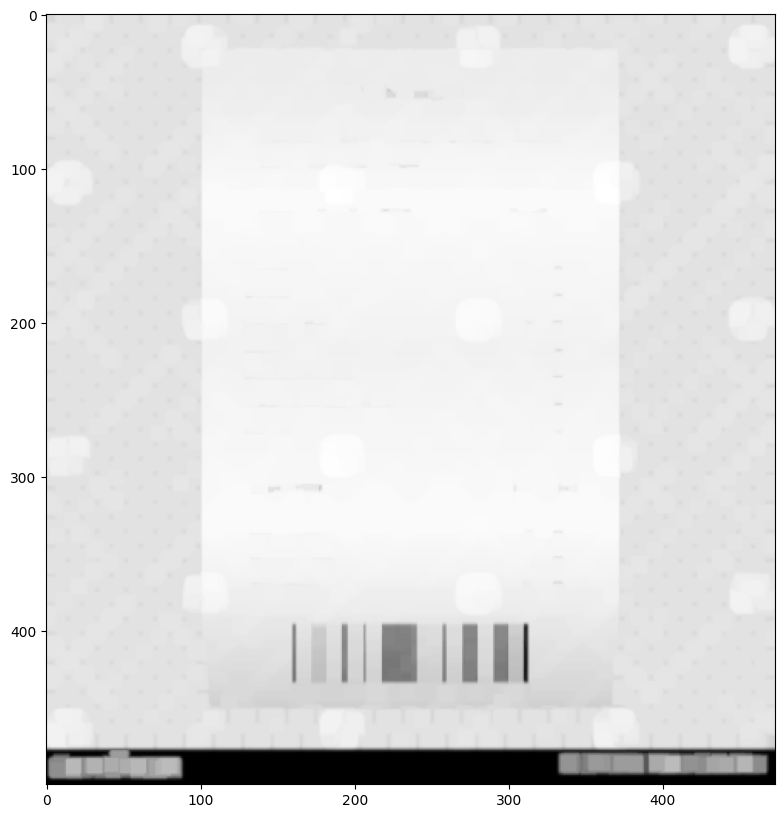

In [97]:
# Detect white regions
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
dilated = cv2.dilate(blurred, rectKernel)
plot_gray(dilated)

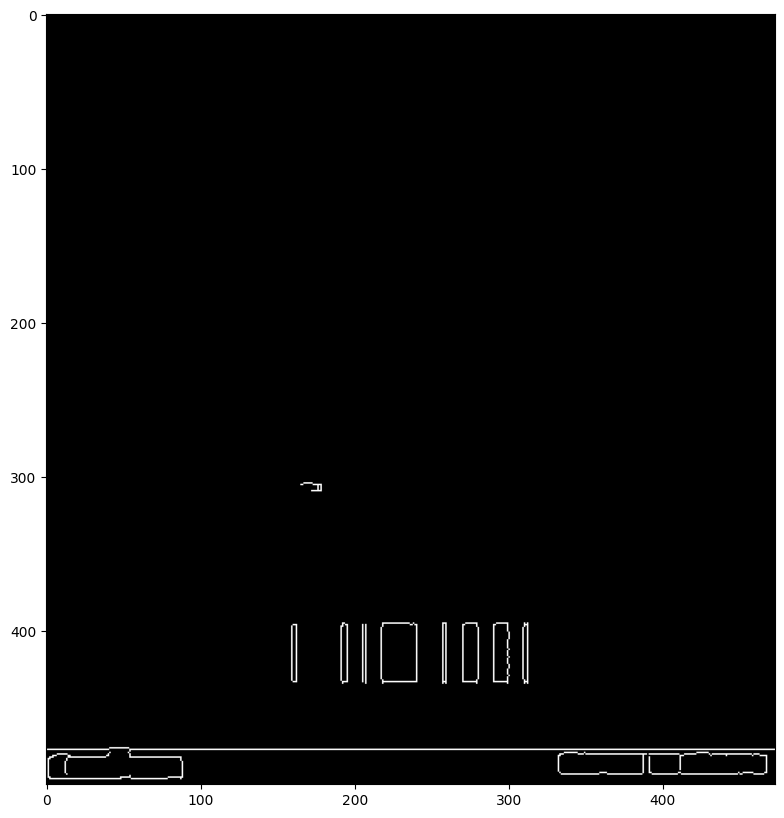

In [98]:
edged = cv2.Canny(dilated, 50, 125, apertureSize=3)
plot_gray(edged)

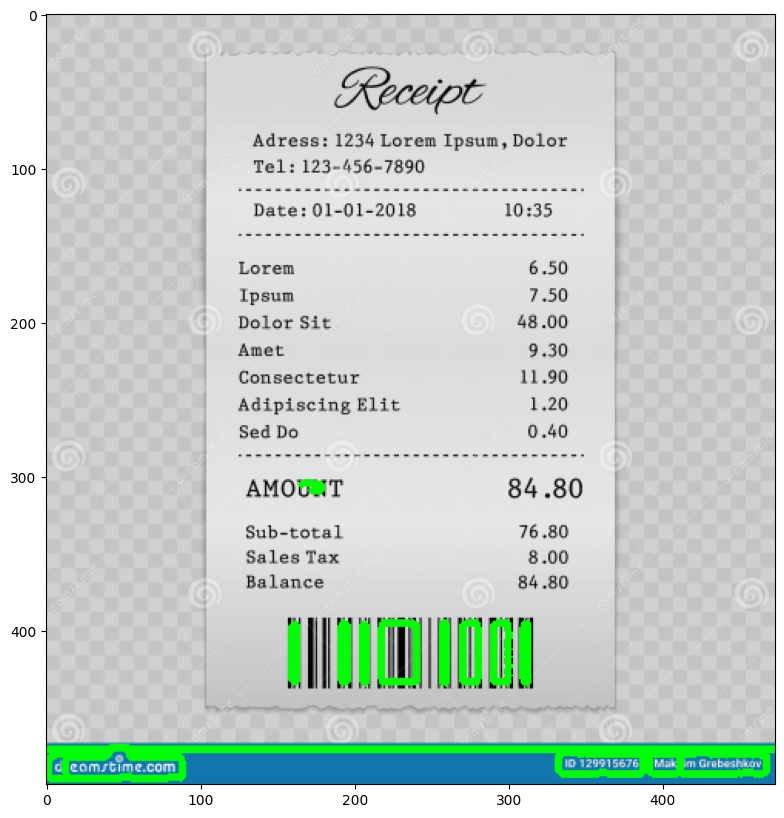

In [99]:
contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image_with_contours = cv2.drawContours(image.copy(), contours, -1, (0,255,0), 3)
plot_rgb(image_with_contours)

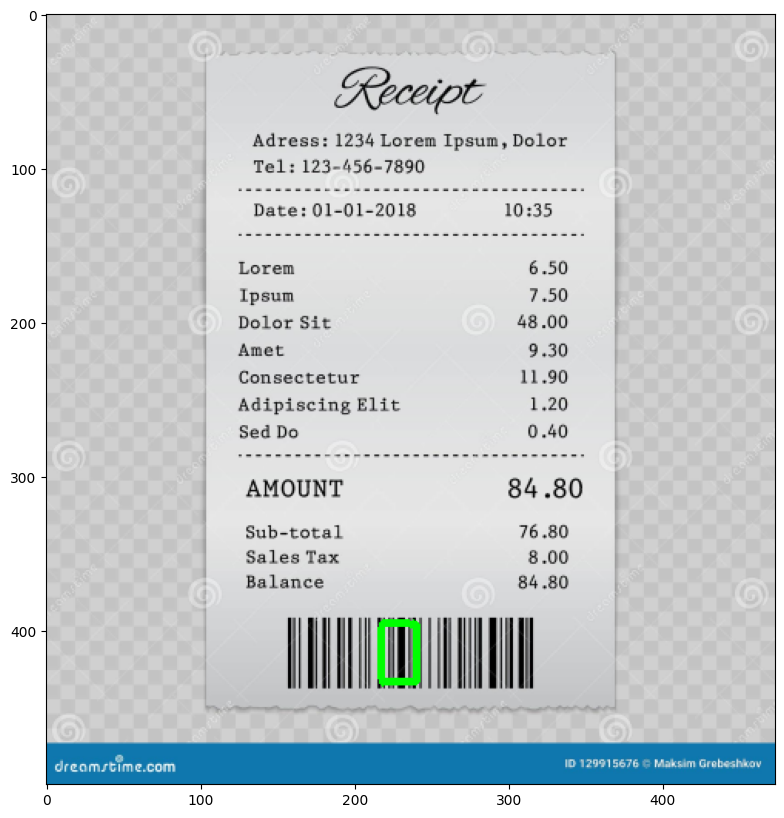

In [100]:
# Get 10 largest contours
largest_contours = sorted(contours, key = cv2.contourArea, reverse = True)[:1]
image_with_largest_contours = cv2.drawContours(image.copy(), largest_contours, -1, (0,255,0), 3)
plot_rgb(image_with_largest_contours)

In [101]:
get_receipt_contour(largest_contours)

array([[[218, 395]],

       [[218, 434]],

       [[240, 433]],

       [[240, 396]]], dtype=int32)

In [43]:
receipt_contour = get_receipt_contour(largest_contours)


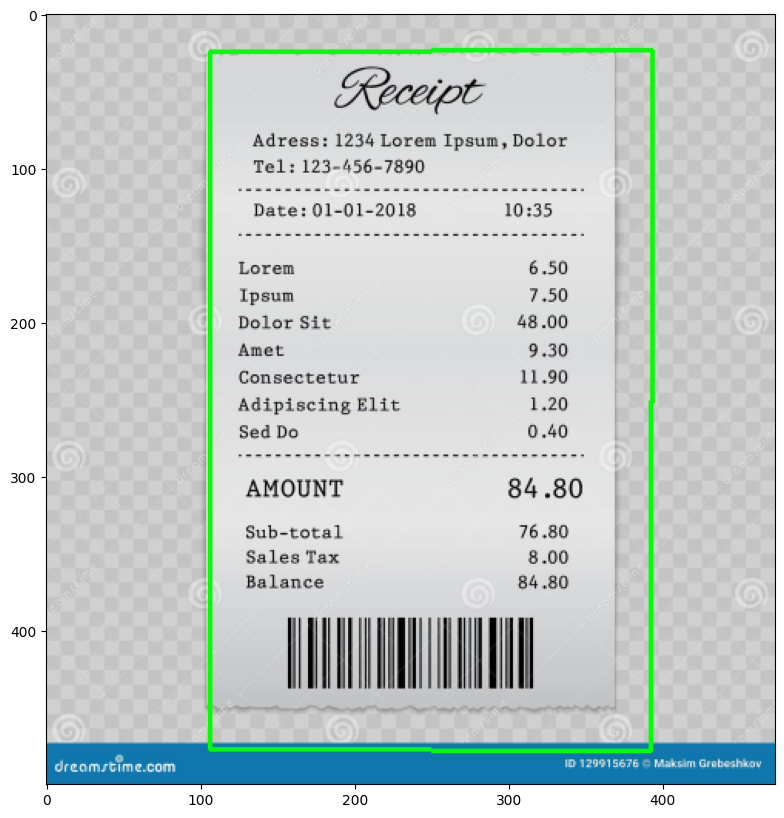

In [102]:
image_with_receipt_contour = cv2.drawContours(image.copy(), [receipt_contour], -1, (0, 255, 0), 2)
plot_rgb(image_with_receipt_contour)

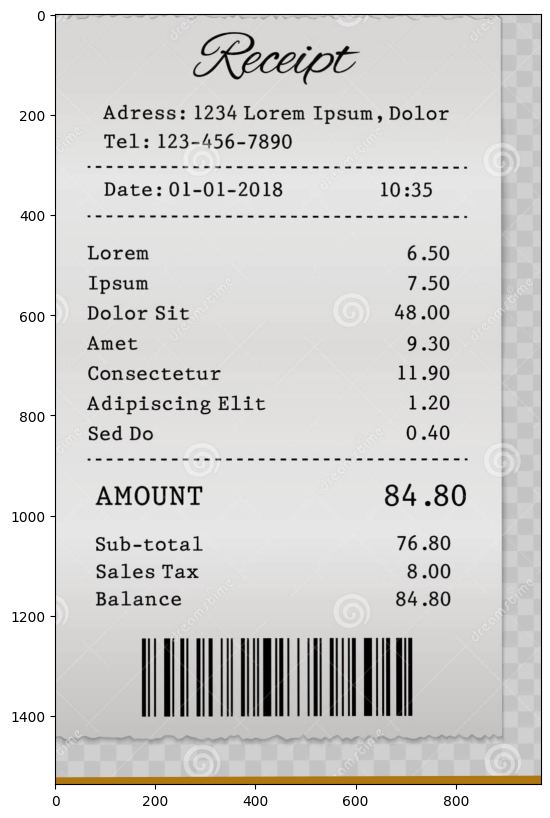

In [103]:
scanned = wrap_perspective(original.copy(), contour_to_rect(receipt_contour))
plt.figure(figsize=(16,10))
plt.imshow(scanned)


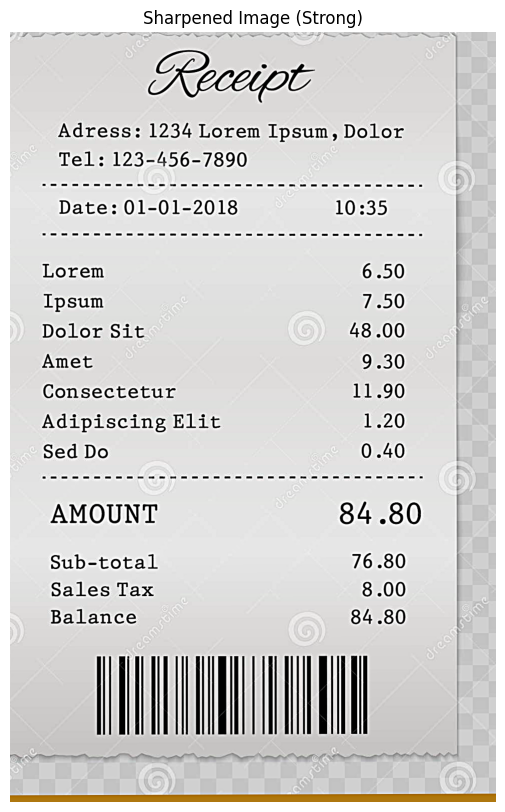

In [104]:
scanned = wrap_perspective(original.copy(), contour_to_rect(receipt_contour))

# Convert to BGR for OpenCV
scanned_bgr = cv2.cvtColor(scanned, cv2.COLOR_RGB2BGR)

# =====================================
# 1️⃣ STRONG SHARPENING (Unsharp Mask)
# =====================================
# Create a blurred version
blur = cv2.GaussianBlur(scanned_bgr, (0, 0), sigmaX=3)

# Unsharp masking formula
sharpened = cv2.addWeighted(scanned_bgr, 1.8, blur, -0.8, 0)
# You can increase 1.8 → 2.0 or 2.5 for even stronger sharpening

# Convert back to RGB for display
sharpened_rgb = cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16,10))
plt.imshow(sharpened_rgb)
plt.title("Sharpened Image (Strong)")
plt.axis("off")
plt.show()


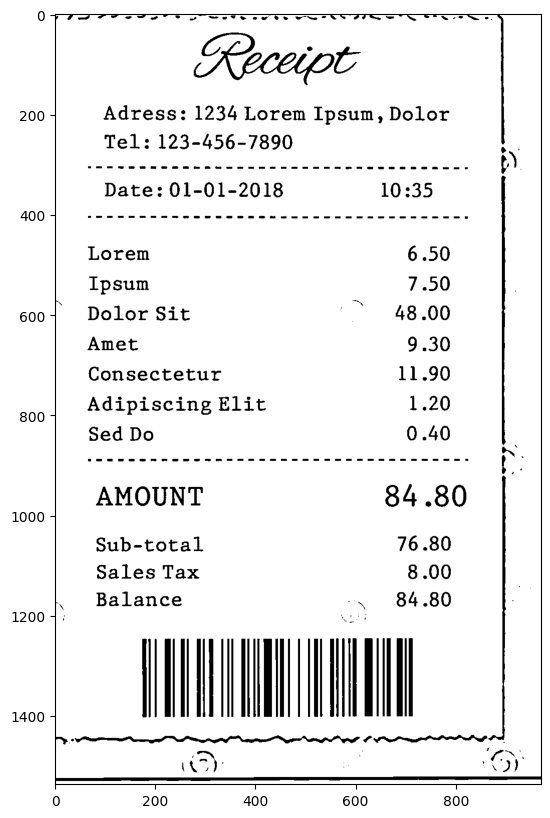

In [105]:
result = bw_scanner(scanned)
plot_gray(result)

In [106]:
#Save image locally
output = Image.fromarray(result)
output.save('result.png')

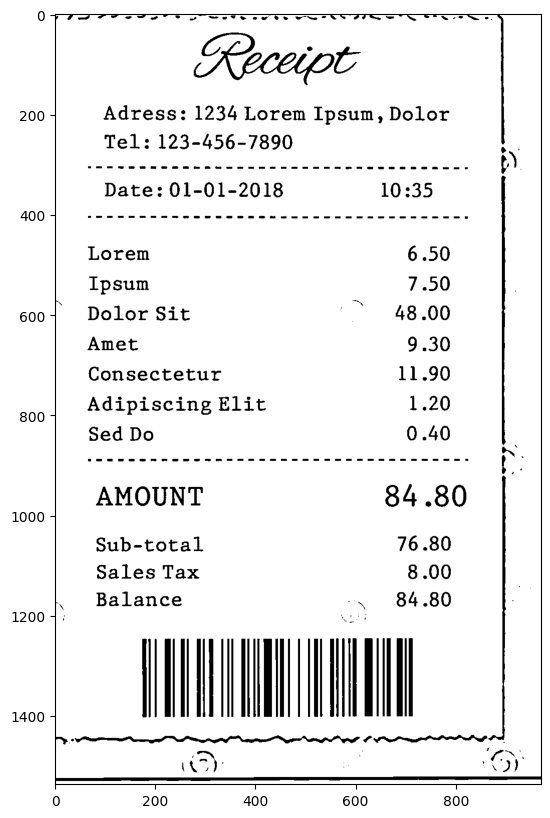

In [107]:
img
file_name = "result.png"
image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)
plot_gray(image)

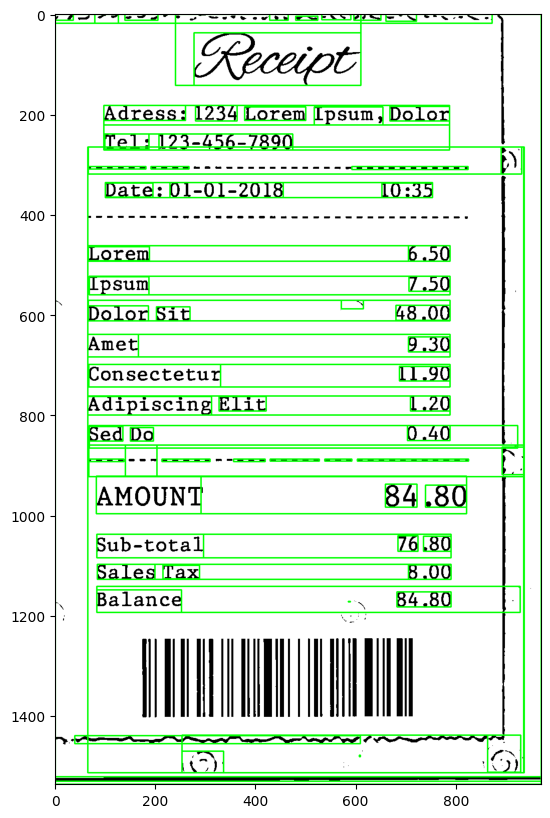

In [108]:
d = pytesseract.image_to_data(image, output_type=Output.DICT)

n_boxes = len(d['level'])
boxes = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    boxes = cv2.rectangle(boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)

plot_rgb(boxes)

In [109]:
custom_config = r'--oem 3 --psm 6'
extracted_text = pytesseract.image_to_string(image, config=custom_config)
print(extracted_text)

ro TOT ee TF eee Fe ew Be we TR Ee Oe Oe
Adress: 1234 Lorem Ipsum, Dolor |
Tel: 123-456-7890
we eee ee eee eee eee eee eeee Oph
Date: 01-01-2018 10:35
Lorem 6.50
Ipsum 7.50 ,
* Dolor Sit ~~ 48.00
Amet 9.30
Consectetur 11.90
Adipiscing Elit 1.20
Sed Do 0.40 ;
et
toto teres merc r scree scores ccs {:
AMOUNT 84 .80
Sub-total 76 .80
Sales Tax 8.00
. Balance S 84 .80 :
aN rN NO NANNERL. FELLA LAA, s
us): , OY



In [110]:
#Lines to excluse on the receipt
exclusion_list = ["bank", "total", "promo", "vat", "change", "recyclable"]

#Words to ommit
remove_list = ["vit", "etc"]

In [111]:
#Extract letters and numbers regex
regex_line = []
for line in extracted_text.splitlines():
    if re.search(r"[0-9]*\.[0-9]|[0-9]*\,[0-9]", line):
        regex_line.append(line)
print(regex_line)

['Lorem 6.50', 'Ipsum 7.50 ,', '* Dolor Sit ~~ 48.00', 'Amet 9.30', 'Consectetur 11.90', 'Adipiscing Elit 1.20', 'Sed Do 0.40 ;', 'AMOUNT 84 .80', 'Sub-total 76 .80', 'Sales Tax 8.00', '. Balance S 84 .80 :']


In [112]:
#Apply exclusion list
food_item = []
for eachLine in regex_line:
    found = False
    for exclude in exclusion_list:
        if exclude in eachLine.lower():
            found = True

    if found == False:
        food_item.append(eachLine)
print(food_item)

['Lorem 6.50', 'Ipsum 7.50 ,', '* Dolor Sit ~~ 48.00', 'Amet 9.30', 'Consectetur 11.90', 'Adipiscing Elit 1.20', 'Sed Do 0.40 ;', 'AMOUNT 84 .80', 'Sales Tax 8.00', '. Balance S 84 .80 :']


In [113]:
#Word ommit
new_food_item_list = []
for item in food_item:
    for subToRemove in remove_list:
        item = item.replace(subToRemove, "")
        item = item.replace(subToRemove.upper(), "")
    new_food_item_list.append(item)
print(new_food_item_list)

['Lorem 6.50', 'Ipsum 7.50 ,', '* Dolor Sit ~~ 48.00', 'Amet 9.30', 'Consectetur 11.90', 'Adipiscing Elit 1.20', 'Sed Do 0.40 ;', 'AMOUNT 84 .80', 'Sales Tax 8.00', '. Balance S 84 .80 :']


In [114]:
#Food item cost regex
food_item_cost = []
for line in new_food_item_list:
    line = line.replace(",", ".")
    cost = re.findall('\d*\.?\d+|\d*\,?\d+|',line)

    for possibleCost in cost:
        if "." in possibleCost:
            food_item_cost.append(possibleCost)
print(new_food_item_list)

['Lorem 6.50', 'Ipsum 7.50 ,', '* Dolor Sit ~~ 48.00', 'Amet 9.30', 'Consectetur 11.90', 'Adipiscing Elit 1.20', 'Sed Do 0.40 ;', 'AMOUNT 84 .80', 'Sales Tax 8.00', '. Balance S 84 .80 :']


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-701203688.py:5: SyntaxWarning: invalid escape sequence '\d'
  cost = re.findall('\d*\.?\d+|\d*\,?\d+|',line)


In [115]:
count = 0;
only_food_items = []
for item in new_food_item_list:
    only_alpha = ""
    for char in item:
        if char.isalpha() or char.isspace():
            only_alpha += char

    only_alpha = re.sub(r'(?:^| )\w(?:$| )', ' ', only_alpha).strip()
    only_food_items.append(only_alpha)
print(only_food_items)

['Lorem', 'Ipsum', 'Dolor Sit', 'Amet', 'Consectetur', 'Adipiscing Elit', 'Sed Do', 'AMOUNT', 'Sales Tax', 'Balance']


In [116]:
#Removes 2 letter words from food item
#No core food item has two letters (Most cases)
food = []
for item in only_food_items:
    # getting splits
    temp = item.split()

    # omitting K lengths
    res = [ele for ele in temp if len(ele) != 2]

    # joining result
    res = ' '.join(res)

    food.append(res)
print(food)

['Lorem', 'Ipsum', 'Dolor Sit', 'Amet', 'Consectetur', 'Adipiscing Elit', 'Sed', 'AMOUNT', 'Sales Tax', 'Balance']


In [117]:
#Taulate Food Item and Cost
t = PrettyTable(['Food Item', 'Cost'])
for counter in range (0,len(food)):
    t.add_row([food[counter], food_item_cost[counter]])
print(t)

+-----------------+-------+
|    Food Item    |  Cost |
+-----------------+-------+
|      Lorem      |  6.50 |
|      Ipsum      |  7.50 |
|    Dolor Sit    | 48.00 |
|       Amet      |  9.30 |
|   Consectetur   | 11.90 |
| Adipiscing Elit |  1.20 |
|       Sed       |  0.40 |
|      AMOUNT     |  .80  |
|    Sales Tax    |  8.00 |
|     Balance     |  .80  |
+-----------------+-------+


### **CNN** ga oid boshqa misol

In [ ]:
# imports for the tutorial
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:

# imports for the tutorial
import numpy as np
import matplotlib.pyplot as plt
import time
import os

# pytorch
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [ ]:
# define pre-processing steps on the images
# also called "data augementation" (only done for the train set)

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Normalize the test set same as training set without augmentation
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# load dataset
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

trainset = torchvision.datasets.CIFAR10(
    root='./datasets', train=True, download=True, transform=transform_train)

testset = torchvision.datasets.CIFAR10(
    root='./datasets', train=False, download=True, transform=transform_test)

In [ ]:
# let's see some of the images
def convert_to_imshow_format(image):
    # first convert back to [0,1] range from [-1,1] range - approximately...
    image = image / 2 + 0.5
    image = image.numpy()
    # convert from CHW to HWC
    # from 3x32x32 to 32x32x3
    return image.transpose(1,2,0)

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=4,
                                          shuffle=True)
dataiter = iter(trainloader)
images, labels = next(dataiter)

fig, axes = plt.subplots(1, len(images), figsize=(12,2.5))
for idx, image in enumerate(images):
    axes[idx].imshow(convert_to_imshow_format(image))
    axes[idx].set_title(classes[labels[idx]])
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])

In [ ]:
class CifarCNN(nn.Module):
    """CNN for the CIFAR-10 Datset"""

    def __init__(self):
        """CNN Builder."""
        super(CifarCNN, self).__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )


        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(512, 10)
        )


    def forward(self, x):
        """Perform forward."""

        # conv layers
        x = self.conv_layer(x)

        # flatten
        x = x.view(x.size(0), -1)

        # fc layer
        x = self.fc_layer(x)

        return x

In [ ]:
batch_size = 128
learning_rate = 1e-4
epochs = 20

trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size, shuffle=False, num_workers=2)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

criterion = nn.CrossEntropyLoss()

model = CifarCNN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
def calculate_accuracy(model, dataloader, device):
    model.eval() # put in evaluation mode
    total_correct = 0
    total_images = 0
    confusion_matrix = np.zeros([10,10], int)
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_images += labels.size(0)
            total_correct += (predicted == labels).sum().item()
            for i, l in enumerate(labels):
                confusion_matrix[l.item(), predicted[i].item()] += 1

    model_accuracy = total_correct / total_images * 100
    return model_accuracy, confusion_matrix

In [ ]:
# training loop
for epoch in range(1, epochs + 1):
    model.train()  # put in training mode
    running_loss = 0.0
    epoch_time = time.time()
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # send them to device
        inputs = inputs.to(device)
        labels = labels.to(device)

        # forward + backward + optimize
        outputs = model(inputs)  # forward pass
        loss = criterion(outputs, labels)  # calculate the loss
        # always the same 3 steps
        optimizer.zero_grad()  # zero the parameter gradients
        loss.backward()  # backpropagation
        optimizer.step()  # update parameters

        # print statistics
        running_loss += loss.data.item()

    running_loss /= len(trainloader)

    train_accuracy, _ = calculate_accuracy(model, trainloader, device)
    test_accuracy, _ = calculate_accuracy(model, testloader, device)

    log = "Epoch: {} | Loss: {:.4f} | Training accuracy: {:.3f}% | Test accuracy: {:.3f}% | ".format(epoch, running_loss, train_accuracy, test_accuracy)
    epoch_time = time.time() - epoch_time
    log += "Epoch Time: {:.2f} secs".format(epoch_time)
    print(log)

    # save model
    if epoch % 10 == 0:
        print('==> Saving model ...')
        state = {
            'net': model.state_dict(),
            'epoch': epoch,
        }
        if not os.path.isdir('checkpoints'):
            os.mkdir('checkpoints')
        torch.save(state, './checkpoints/cifar_cnn_ckpt.pth')

print('==> Finished Training ...')

In [ ]:

print(model.conv_layer)
layer = model.conv_layer[0]
weight_tensor = layer.weight.data.cpu()

num_kernels = weight_tensor.shape[0]

num_cols = 12
num_rows = num_kernels

fig = plt.figure(figsize=(num_cols, num_rows))
for i in range(weight_tensor.shape[0]):
    ax1 = fig.add_subplot(num_rows, num_cols, i+1)

    npimg = np.array(weight_tensor[i].numpy(), np.float32)
    npimg = (npimg - np.mean(npimg)) / np.std(npimg)
    npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
    npimg = npimg.transpose((1, 2, 0))
    ax1.imshow(npimg)
    ax1.axis('off')
    ax1.set_title(str(i))
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])

plt.tight_layout()

In [ ]:
model = CifarCNN()
checkpoint = torch.load('./checkpoints/cifar_cnn_ckpt.pth')
model.load_state_dict(checkpoint['net'])
model.to(device)
model.eval()

dataiter = iter(testloader)
images, labels = next(dataiter)

images_on_device = images.to(device)

with torch.no_grad():
    outputs = model(images_on_device)
    _, predicted = torch.max(outputs.data, 1)

fig, axes = plt.subplots(1, len(images), figsize=(12, 2.5))
for idx, image in enumerate(images):
    axes[idx].imshow(convert_to_imshow_format(image))
    axes[idx].set_title(f"True: {classes[labels[idx]]}\nPred: {classes[predicted[idx]]}")
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])

plt.tight_layout()
plt.show()

### **YOLO** misolida

In [ ]:

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

!yolo settings sync=False
import ultralytics
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='/content/fruit.jpg' save=true

In [ ]:
import json
import os
from tqdm import tqdm

# --------------------------
# SETTINGS
# --------------------------
coco_json_path = "/content/fil.json"
output_dir = "/content/yolo_dataset"

# single class:
classes = ["fil"]
# --------------------------

os.makedirs(f"{output_dir}/labels/train", exist_ok=True)
os.makedirs(f"{output_dir}/images/train", exist_ok=True)

#  annotation file
with open(coco_json_path, "r") as f:
    coco = json.load(f)

image_info = {img["id"]: img for img in coco["images"]}

category_map = {cat["id"]: 0 for cat in coco["categories"]}

ann_by_image = {}
for ann in coco["annotations"]:
    img_id = ann["image_id"]
    if img_id not in ann_by_image:
        ann_by_image[img_id] = []
    ann_by_image[img_id].append(ann)

# process each image
for img_id, anns in tqdm(ann_by_image.items()):
    img = image_info[img_id]
    w, h = img["width"], img["height"]
    image_file = img["file_name"]

    # YOLO label file
    txt_path = f"{output_dir}/labels/train/{image_file.replace('.jpg', '.txt').replace('.png', '.txt')}"
    with open(txt_path, "w") as f:

        for ann in anns:
            class_id = category_map[ann["category_id"]]

            for seg in ann["segmentation"]:
                poly = seg

                normalized = []
                for i in range(0, len(poly), 2):
                    x = poly[i] / w
                    y = poly[i + 1] / h
                    normalized.append(x)
                    normalized.append(y)

                # Write: class x1 y1 x2 y2 ... xn yn
                normalized = [class_id] + normalized
                f.write(" ".join(map(str, normalized)) + "\n")

print(" Done! ")


In [ ]:
!yolo task=segment mode=predict model=/content/runs/detect/train5/weights/best.pt conf=0.25 source='/content/fruit.jpg' save=true

## GAN (Generative Adversarial Network) ga oid misollar

In [2]:
import time
import numpy as np
import torch
import torch.nn.functional as F
from torchvision import datasets
from torchvision import transforms
import torch.nn as nn
from torch.utils.data import DataLoader


if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True

In [3]:
##########################
### SETTINGS
##########################

device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")

# Hyperparametrlar
random_seed = 123
generator_learning_rate = 0.001
discriminator_learning_rate = 0.001
NUM_EPOCHS = 100
BATCH_SIZE = 128
LATENT_DIM = 75
IMG_SHAPE = (1, 28, 28)
IMG_SIZE = 1
for x in IMG_SHAPE:
    IMG_SIZE *= x


In [4]:
##########################
### MNIST DATASET
##########################

train_dataset = datasets.MNIST(root='data',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='data',
                              train=False,
                              transform=transforms.ToTensor())


train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset,
                         batch_size=BATCH_SIZE,
                         shuffle=False)

# Datasetni tekshirish
for images, labels in train_loader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

100%|██████████| 9.91M/9.91M [00:00<00:00, 20.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 708kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 5.57MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.81MB/s]


Image batch dimensions: torch.Size([128, 1, 28, 28])
Image label dimensions: torch.Size([128])


In [5]:
##########################
### MODEL
##########################


class GAN(torch.nn.Module):

    def __init__(self):
        super(GAN, self).__init__()


        self.generator = nn.Sequential(
            nn.Linear(LATENT_DIM, 128),
            nn.LeakyReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(128, IMG_SIZE),
            nn.Tanh()
        )

        self.discriminator = nn.Sequential(
            nn.Linear(IMG_SIZE, 128),
            nn.LeakyReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )


    def generator_forward(self, z):
        img = self.generator(z)
        return img

    def discriminator_forward(self, img):
        pred = model.discriminator(img)
        return pred.view(-1)


In [6]:
torch.manual_seed(random_seed)

model = GAN()
model = model.to(device)

optim_gener = torch.optim.Adam(model.generator.parameters(), lr=generator_learning_rate)
optim_discr = torch.optim.Adam(model.discriminator.parameters(), lr=discriminator_learning_rate)

In [7]:
start_time = time.time()

NUM_EPOCHS = 10

discr_costs = []
gener_costs = []
for epoch in range(NUM_EPOCHS):
    model = model.train()
    for batch_idx, (features, targets) in enumerate(train_loader):



        features = (features - 0.5)*2.
        features = features.view(-1, IMG_SIZE).to(device)
        targets = targets.to(device)

        valid = torch.ones(targets.size(0)).float().to(device)
        fake = torch.zeros(targets.size(0)).float().to(device)

        # --------------------------
        # Generator ni o'qitish
        # --------------------------

        # Yangirasmlar yashash
        z = torch.zeros((targets.size(0), LATENT_DIM)).uniform_(-1.0, 1.0).to(device)
        generated_features = model.generator_forward(z)

        # Ajratish
        discr_pred = model.discriminator_forward(generated_features)

        gener_loss = F.binary_cross_entropy(discr_pred, valid)

        optim_gener.zero_grad()
        gener_loss.backward()
        optim_gener.step()

        # --------------------------
        # Ajratuvchini o'qitish
        # --------------------------

        discr_pred_real = model.discriminator_forward(features.view(-1, IMG_SIZE))
        real_loss = F.binary_cross_entropy(discr_pred_real, valid)

        discr_pred_fake = model.discriminator_forward(generated_features.detach())
        fake_loss = F.binary_cross_entropy(discr_pred_fake, fake)

        discr_loss = 0.5*(real_loss + fake_loss)

        optim_discr.zero_grad()
        discr_loss.backward()
        optim_discr.step()

        discr_costs.append(discr_loss)
        gener_costs.append(gener_loss)


        # Log qilish
        if not batch_idx % 10:
            print ('Epoch: %03d/%03d | Batch %03d/%03d | Gen/Dis Loss: %.4f/%.4f'
                   %(epoch+1, NUM_EPOCHS, batch_idx,
                     len(train_loader), gener_loss, discr_loss))

    print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))

print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))

/tmp/ipython-input-4191519682.py:59: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  print ('Epoch: %03d/%03d | Batch %03d/%03d | Gen/Dis Loss: %.4f/%.4f'


Epoch: 001/010 | Batch 000/469 | Gen/Dis Loss: 0.6566/0.7171
Epoch: 001/010 | Batch 010/469 | Gen/Dis Loss: 0.5686/0.4297
Epoch: 001/010 | Batch 020/469 | Gen/Dis Loss: 0.9940/0.3260
Epoch: 001/010 | Batch 030/469 | Gen/Dis Loss: 0.2751/0.9107
Epoch: 001/010 | Batch 040/469 | Gen/Dis Loss: 0.7656/0.4049
Epoch: 001/010 | Batch 050/469 | Gen/Dis Loss: 0.9857/0.2747
Epoch: 001/010 | Batch 060/469 | Gen/Dis Loss: 0.8815/0.3569
Epoch: 001/010 | Batch 070/469 | Gen/Dis Loss: 0.8561/0.4187
Epoch: 001/010 | Batch 080/469 | Gen/Dis Loss: 1.9512/0.1768
Epoch: 001/010 | Batch 090/469 | Gen/Dis Loss: 3.6448/0.0881
Epoch: 001/010 | Batch 100/469 | Gen/Dis Loss: 5.8731/0.0299
Epoch: 001/010 | Batch 110/469 | Gen/Dis Loss: 5.0254/0.0339
Epoch: 001/010 | Batch 120/469 | Gen/Dis Loss: 4.3157/0.0407
Epoch: 001/010 | Batch 130/469 | Gen/Dis Loss: 3.4223/0.0641
Epoch: 001/010 | Batch 140/469 | Gen/Dis Loss: 2.3418/0.1026
Epoch: 001/010 | Batch 150/469 | Gen/Dis Loss: 1.7194/0.1548
Epoch: 001/010 | Batch 1

/tmp/ipython-input-2343403528.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(newlabel[::10])


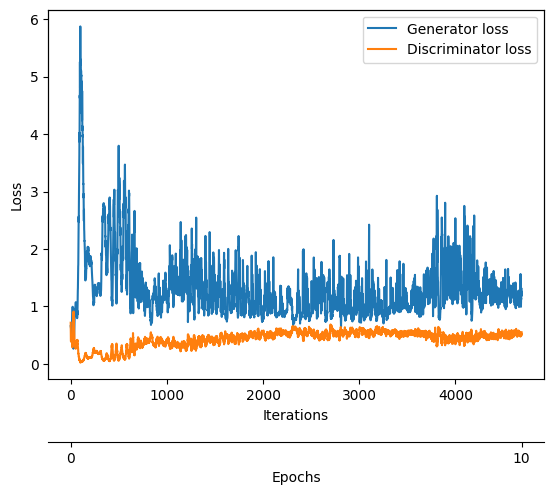

In [8]:

%matplotlib inline
import matplotlib.pyplot as plt

ax1 = plt.subplot(1, 1, 1)
ax1.plot(range(len(gener_costs)), [cost.detach().numpy() for cost in gener_costs], label='Generator loss')
ax1.plot(range(len(discr_costs)), [cost.detach().numpy() for cost in discr_costs], label='Discriminator loss')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Loss')
ax1.legend()

###################

ax2 = ax1.twiny()
newlabel = list(range(NUM_EPOCHS+1))
iter_per_epoch = len(train_loader)
newpos = [e*iter_per_epoch for e in newlabel]

ax2.set_xticklabels(newlabel[::10])
ax2.set_xticks(newpos[::10])

ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.spines['bottom'].set_position(('outward', 45))
ax2.set_xlabel('Epochs')
ax2.set_xlim(ax1.get_xlim())
###################

plt.show()




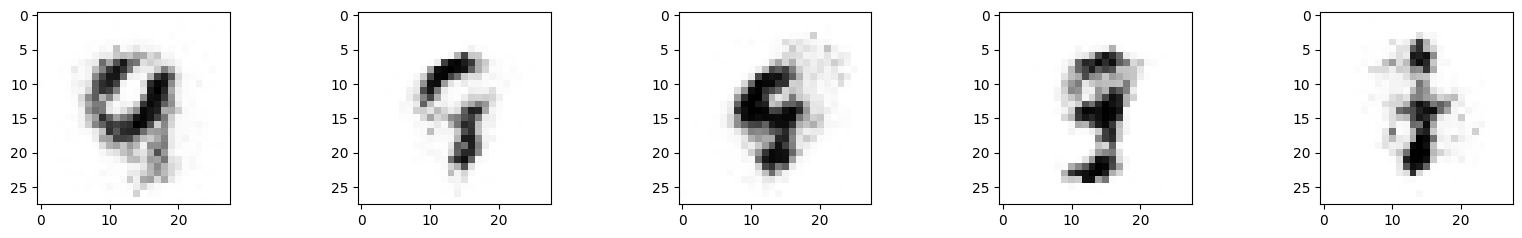

In [12]:
##########################
### VISUALIZATION
##########################


model.eval()
# Yangi rasmlar yasash
z = torch.zeros((5, LATENT_DIM)).uniform_(-1.0, 1.0).to(device)
generated_features = model.generator_forward(z)
imgs = generated_features.view(-1, 28, 28)

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 2.5))


for i, ax in enumerate(axes):
    axes[i].imshow(imgs[i].to(torch.device('cpu')).detach(), cmap='binary')

## Mediapipe LANDMARKS ( Yuzga nuqtalarni joylashtirish )

In [ ]:
!pip install mediapipe opencv-python

In [ ]:
# https://youtu.be/Q463j1tOWP8?si=Y63wO54-RDqEJIfo

In [ ]:
# ======================================
# MEDIAPIPE - yuzdagi nuqtalarni topish
# ======================================

import cv2
import mediapipe as mp
from google.colab import files
import matplotlib.pyplot as plt

image_path = '/content/c.jpg'

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mediapipe ni ishga tushirish
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils
mp_styles = mp.solutions.drawing_styles

with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5
) as face_mesh:


    results = face_mesh.process(image)

    if not results.multi_face_landmarks:
        print("Nuqtalar yo'q")
    else:

        # Nuqtalarni chiqiz boshlandi
        annotated = image.copy()
        for face_landmarks in results.multi_face_landmarks:


            mp_drawing.draw_landmarks(
                image=annotated,
                landmark_list=face_landmarks,
                connections=mp_face_mesh.FACEMESH_TESSELATION,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_styles.get_default_face_mesh_tesselation_style()
            )

            mp_drawing.draw_landmarks(
                image=annotated,
                landmark_list=face_landmarks,
                connections=mp_face_mesh.FACEMESH_CONTOURS,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_styles.get_default_face_mesh_contours_style()
            )
            mp_drawing.draw_landmarks(
                image=annotated,
                landmark_list=face_landmarks,
                connections=mp_face_mesh.FACEMESH_IRISES,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_styles.get_default_face_mesh_iris_connections_style()
            )

            mp_drawing.draw_landmarks(
                image=annotated,
                landmark_list=face_landmarks,
                connections=None,
                landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0,255,0), thickness=1, circle_radius=1)
            )

        plt.figure(figsize=(8, 6))
        plt.imshow(annotated)
        plt.axis('off')
        plt.title("Yuzdagi nuqtalar")
        plt.show()

In [ ]:

face_path = "/content/c.jpg"
apple_path = "/content/olma.png"

face_img = cv2.imread(face_path)
face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
apple_img = cv2.imread(apple_path, cv2.IMREAD_UNCHANGED)
mp_face_mesh = mp.solutions.face_mesh

with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5
) as face_mesh:
    results = face_mesh.process(face_img)

if not results.multi_face_landmarks:
    print(" Yuz topilmadi")
else:
    annotated = face_img.copy()
    h, w, _ = annotated.shape
    face_landmarks = results.multi_face_landmarks[0]



    #  NUQTANI BELGILASH
    landmark_index = 10
    landmark = face_landmarks.landmark[landmark_index]
    x = int(landmark.x * w)
    y = int(landmark.y * h)

    print(f" OLMA + #{landmark_index} ")
    print(f"KORDINATA O'QI:  ({x}, {y})")



    # Olmani razmerini belgilash
    scale = 0.5
    apple_h, apple_w = apple_img.shape[:2]
    new_w = int(apple_w * scale)
    new_h = int(apple_h * scale)
    apple_resized = cv2.resize(apple_img, (new_w, new_h))

    x1, y1 = x - new_w // 2, y - new_h // 2
    x2, y2 = x1 + new_w, y1 + new_h

    x1 = max(0, x1)
    y1 = max(0, y1)
    x2 = min(w, x2)
    y2 = min(h, y2)

    roi = annotated[y1:y2, x1:x2]

    if apple_resized.shape[2] == 4:
        alpha = apple_resized[:, :, 3] / 255.0
        for c in range(3):
            roi[:, :, c] = (1 - alpha) * roi[:, :, c] + alpha * apple_resized[:, :, c]
    else:
        roi[:] = apple_resized

    annotated[y1:y2, x1:x2] = roi
    plt.figure(figsize=(8, 6))
    plt.imshow(annotated)
    plt.axis('off')
    plt.title(f"LANDMARK NUQTA:  -> {landmark_index} ")
    plt.show()